In [2]:
import pandas as pd

In [3]:
# df = pd.read_excel('Messages/messages.xlsx')
# df = pd.read_excel('Messages/labelled_messages.xlsx')
# df = pd.read_excel('Messages/final_msgz.xlsx')
df = pd.read_excel('Messages/merged.xlsx')

In [4]:
df = df[(df['Sentiment'] == 0) | (df['Sentiment'] == 1)]

In [5]:
df['Sentiment'].unique()

array([1, 0], dtype=int64)

In [6]:
idx = len(df) - 1

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.iloc[idx]

Message      sorry for taking over twitter with my i-can`t-...
Sentiment                                                    1
Name: 19520, dtype: object

In [9]:
import string
import numpy as np
def check_english(msg):
    new_msg = ''
    alpha = ' '.join(string.ascii_letters).split() 
    alpha.append(' ')
    for char in msg:
        if char in alpha:
            new_msg = new_msg + char
    msg = new_msg
    return np.nan if len(msg.split()) == 0 else msg

In [10]:
count = len(df.iloc[:idx + 1][df.iloc[:idx+1]['Message'].isna()])
idx -= count

In [11]:
df.dropna(inplace=True)

In [12]:
df.iloc[idx]

Message      sorry for taking over twitter with my i-can`t-...
Sentiment                                                    1
Name: 19520, dtype: object

In [13]:
df[df['Message'].isna()]

,Message,Sentiment


In [14]:
# removing @mentions
df['Message'] = df['Message'].apply(lambda msg: np.nan if '@' in msg else msg)
count = len(df.iloc[:idx + 1][df.iloc[:idx+1]['Message'].isna()])
idx -= count

In [15]:
df.dropna(inplace=True)

In [16]:
df.iloc[idx]

Message      sorry for taking over twitter with my i-can`t-...
Sentiment                                                    1
Name: 19520, dtype: object

In [17]:
df[df['Message'].isna()]

,Message,Sentiment


In [18]:
# removing # tags
df['Message'] = df['Message'].apply(lambda msg: np.nan if '#' in msg else msg)
count = len(df.iloc[:idx + 1][df.iloc[:idx+1]['Message'].isna()])
idx -= count

In [19]:
df.dropna(inplace=True)

In [20]:
df.iloc[idx]

Message      sorry for taking over twitter with my i-can`t-...
Sentiment                                                    1
Name: 19520, dtype: object

In [21]:
df[df['Message'].isna()]

,Message,Sentiment


In [22]:
count = len(df.iloc[:idx+1][df.iloc[:idx + 1]['Message'].apply(check_english).isna()])
idx -= count
df['Message'] = df['Message'].apply(check_english)

In [23]:
df.dropna(inplace=True)

In [24]:
df.iloc[idx]

Message      sorry for taking over twitter with my icantsle...
Sentiment                                                    1
Name: 19520, dtype: object

In [25]:
df[df['Message'].isna()]

,Message,Sentiment


In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df['Message'] = df['Message'].apply(lambda msg: np.nan if 'htt' in msg else msg)
count = len(df.iloc[:idx + 1][df.iloc[:idx+1]['Message'].isna()])
idx -= count

In [28]:
df.dropna(inplace=True)

In [29]:
df[df['Message'].isna()]

,Message,Sentiment


In [30]:
df.iloc[idx]

Message      sorry for taking over twitter with my icantsle...
Sentiment                                                    1
Name: 18969, dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18267 entries, 0 to 18969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Message    18267 non-null  object
 1   Sentiment  18267 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 428.1+ KB


In [32]:
# empjis
# punctuations
# lowercase
# stopwords -> such as "and, but, or in" are removed which do not help in training 
# stemming -> running, runs are same words so converted into run as base form

In [33]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
stemmer = SnowballStemmer("english")
def extreme_clean(msg):
    new_msg = ''
    for word in msg.split():
        new_msg = new_msg + ' ' + stemmer.stem(word)
    msg = new_msg
    nopunc = [char for char in msg if char.lower() not in string.punctuation]
    nopunc = ''.join(nopunc)
    # convert to lower case. 
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
test_msg = df.iloc[0]['Message']

In [35]:
' '.join(extreme_clean(test_msg))

'love comment flashcad im old school'

In [36]:
test_msg

' Loved the comment on flashcads Im old school too'

In [37]:
df.iloc[idx] # last message that was labbeled

Message      sorry for taking over twitter with my icantsle...
Sentiment                                                    1
Name: 18969, dtype: object

# Final analyzer results. 
# This input will be given to CountVectorizer, then to TfIdfTransformer and then to KNeighboursClassifier

In [38]:
# analyzed_messages = df['Message'].apply(extreme_clean)
# for msg in analyzed_messages:
#     print(msg)

# Testing different K values

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
def get_best_K(X_train_transformed, x_test_transformed, y_train, y_test):
    error = []
    
    for i in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train_transformed, y_train)
        pred_i = knn.predict(x_test_transformed)
        error.append(np.mean(pred_i != y_test))
    return error

def plot_K(error):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(range(1,30),error,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def test_accuracy(df):
    pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=extreme_clean)),
        ('tf-idf', TfidfTransformer()),
    ])
    
    X = df['Message']# inputs
    y = df['Sentiment']# labelss
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pipeline.fit(X_train,y_train)
    X_train_transformed = pipeline['tf-idf'].transform(pipeline['bow'].transform(X_train))
    x_test_transformed = pipeline['tf-idf'].transform(pipeline['bow'].transform(X_test))
    err = get_best_K(X_train_transformed, x_test_transformed, y_train,y_test)
    plot_K(err)
    knn = KNeighborsClassifier(n_neighbors=np.argmin(err) + 1)
    knn.fit(X_train_transformed, y_train)
    predictions = knn.predict(x_test_transformed)
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    return accuracy_score(y_test, predictions)

In [41]:
test_accuracy(df)

[[2488  326]
 [ 676 1991]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2814
           1       0.86      0.75      0.80      2667

    accuracy                           0.82      5481
   macro avg       0.82      0.82      0.82      5481
weighted avg       0.82      0.82      0.82      5481



0.8171866447728516

In [42]:
df['text'] = df['Message'].apply(extreme_clean)

In [43]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [44]:
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['text'] = df['Message'].apply(replace_chat_words)

In [45]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [46]:
stop = stopwords.words('english')
df["text"] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [47]:
df['text'] = df['text'].str.lower()

In [48]:
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)

In [49]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

In [50]:
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [51]:
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)

In [52]:
df.head()

,Message,Sentiment,text
0,Loved the comment on flashcads Im old school too,0,loved comment flashcads im old school
1,mine too,0,mine
2,Thinks that my friends lifes go around with wh...,1,thinks friends lifes go around boyfriends time...
3,Helloooo Star Wars day is cool LOOL Wen do ...,0,helloooo star wars day cool lool wen go cnater...
4,tamlyn wishes she was as cool as my sock draw,0,tamlyn wishes cool sock draw


In [53]:
X = df['text']# inputz
y = df['Sentiment']# labelss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=900)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)    
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [54]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 92


In [55]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [56]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[221  10 161 ...   0   0   0]
 [150 161   1 ...   0   0   0]
 [482   1   9 ...   0   0   0]
 ...
 [ 33   1 219 ...   0   0   0]
 [788   4 347 ...   0   0   0]
 [  1 278  84 ...   0   0   0]]

X_test_padded:
[[ 90   0   0 ...   0   0   0]
 [151   0   0 ...   0   0   0]
 [658  16   8 ...   0   0   0]
 ...
 [ 76 583   0 ...   0   0   0]
 [734   2 706 ...   0   0   0]
 [  7  17   3 ...   0   0   0]]


In [57]:
# Embedding Input Size
input_size = np.max(X_train_padded) + 1
input_size

900

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, BatchNormalization, Dropout, Dense, Input

# Define the model
model = Sequential()

model.add(Input(shape=(79,)))  # Assuming input length is 79

# Add an embedding layer 
model.add(Embedding(input_dim=input_size, output_dim=100))

# Add a bidirectional GRU layer with 128 units
model.add(Bidirectional(LSTM(128)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add dropout regularization
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 6 units for 6 labels and softmax activation
model.add(Dense(6, activation='softmax'))

In [59]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding (Embedding)         │ (None, 79, 100)        │       90,000 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ bidirectional (Bidirectional) │ (None, 256)            │      234,496 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ batch_normalization           │ (None, 256)            │        1,024 │
│ (BatchNormalization)          │                        │              │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 256)            │            0 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)             │       16,448 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 64)             │            0 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 6)              │          390 │
└───────────────────────────────┴────────────────────────┴──────────────┘

 Total params: 342,358 (1.31 MB)

 Trainable params: 341,846 (1.30 MB)

 Non-trainable params: 512 (2.00 KB)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

# Model Train 
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=32, validation_data=(X_test_padded, y_test),callbacks=[EarlyStopping(patience=3)])

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.6389 - loss: 0.8462 - val_accuracy: 0.7493 - val_loss: 0.5307
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.8273 - loss: 0.3866 - val_accuracy: 0.5351 - val_loss: 1.4888
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.8430 - loss: 0.3560 - val_accuracy: 0.8340 - val_loss: 0.3692
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.8416 - loss: 0.3468 - val_accuracy: 0.8247 - val_loss: 0.3722
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.8513 - loss: 0.3272 - val_accuracy: 0.3375 - val_loss: 3.2383
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.8523 - loss: 0.3131 - val_accuracy: 0.8186 - val_loss: 0.4919


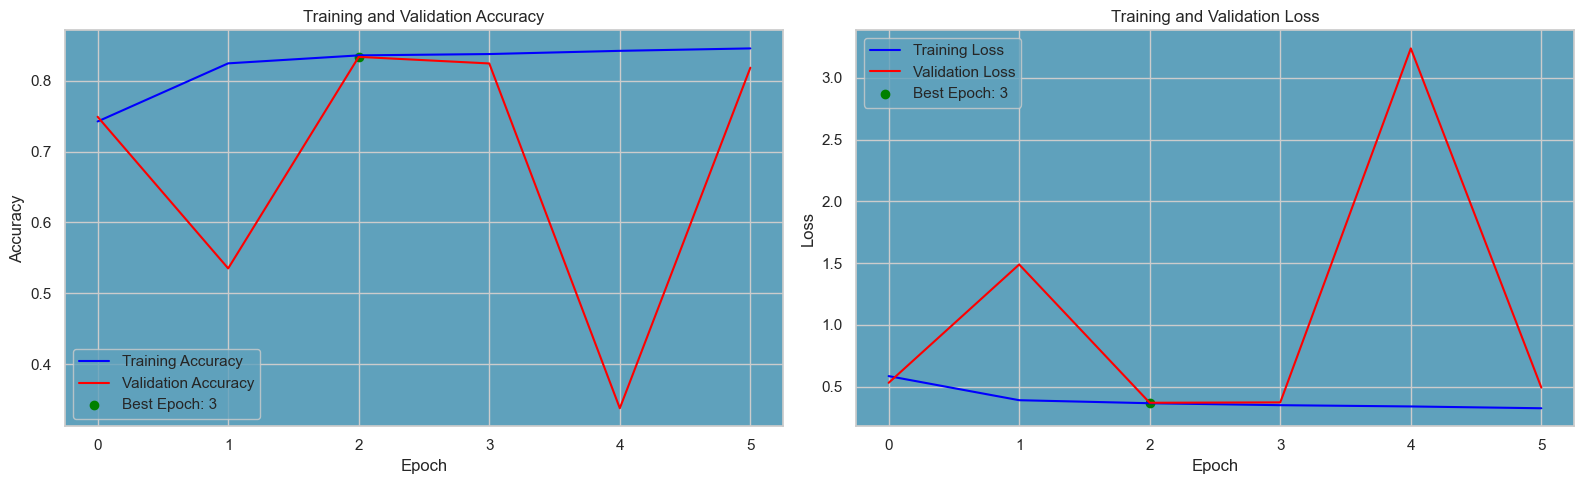

In [61]:
# Set the background color and theme
import seaborn as sns
import matplotlib.pyplot as plt
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [62]:
model.evaluate(X_test_padded, y_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8155 - loss: 0.5244


[0.4918845593929291, 0.818646252155304]

In [63]:
# Predictions On Test For Confustion Matrix 
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


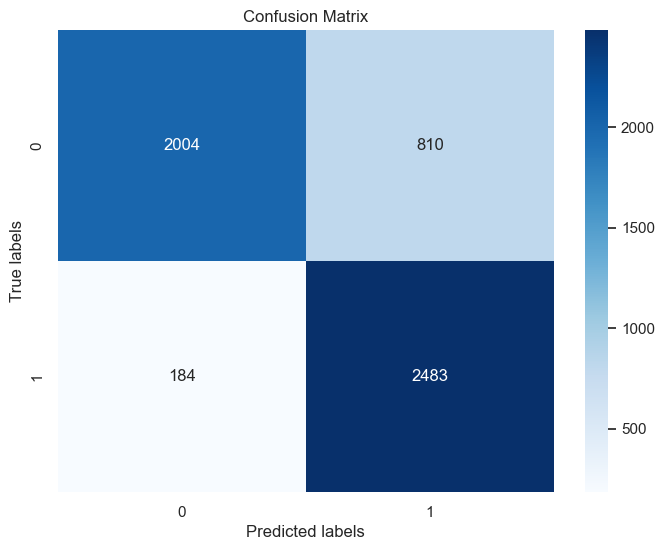

In [64]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      2814
           1       0.75      0.93      0.83      2667

    accuracy                           0.82      5481
   macro avg       0.83      0.82      0.82      5481
weighted avg       0.84      0.82      0.82      5481



# SVC

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=extreme_clean)),
    ('tf-idf', TfidfTransformer()),
])

X = df['Message']# inputs
y = df['Sentiment']# labelss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train,y_train)
X_train_transformed = pipeline['tf-idf'].transform(pipeline['bow'].transform(X_train))
x_test_transformed = pipeline['tf-idf'].transform(pipeline['bow'].transform(X_test))
param_grid = {'C':[0.1,1.0,10,100], 'gamma': [0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_transformed,y_train)
predictions = grid.predict(x_test_transformed)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.675 total time=  11.8s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.695 total time=  12.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.694 total time=  11.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.683 total time=  10.9s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.675 total time=  10.7s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=  10.8s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=  11.7s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=  14.1s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=  14.4s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=  12.9s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.524 total time=  12.7s
[CV 2/5] END ................C=0.1, gamma=0.001;

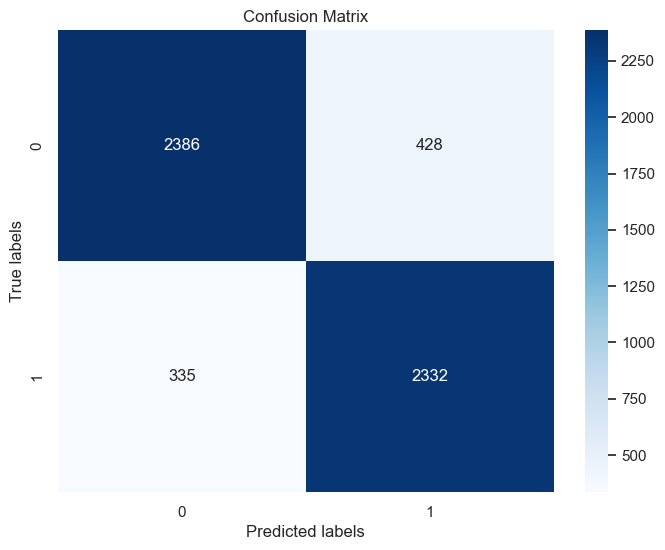

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2814
           1       0.84      0.87      0.86      2667

    accuracy                           0.86      5481
   macro avg       0.86      0.86      0.86      5481
weighted avg       0.86      0.86      0.86      5481



In [70]:
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, predictions))

In [71]:
param_grid = {'n_neighbors': np.arange(1,30)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
grid.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.582 total time=   0.7s
[CV 2/5] END .....................n_neighbors=1;, score=0.582 total time=   0.7s
[CV 3/5] END .....................n_neighbors=1;, score=0.571 total time=   0.6s
[CV 4/5] END .....................n_neighbors=1;, score=0.575 total time=   0.7s
[CV 5/5] END .....................n_neighbors=1;, score=0.569 total time=   0.6s
[CV 1/5] END .....................n_neighbors=2;, score=0.569 total time=   0.7s
[CV 2/5] END .....................n_neighbors=2;, score=0.578 total time=   0.7s
[CV 3/5] END .....................n_neighbors=2;, score=0.587 total time=   0.7s
[CV 4/5] END .....................n_neighbors=2;, score=0.584 total time=   0.9s
[CV 5/5] END .....................n_neighbors=2;, score=0.583 total time=   0.7s
[CV 1/5] END .....................n_neighbors=3;, score=0.594 total time=   0.7s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=3)

In [72]:
grid_predictions = grid.predict(x_test_transformed)
print(confusion_matrix(y_test,grid_predictions))

[[2486  328]
 [ 669 1998]]


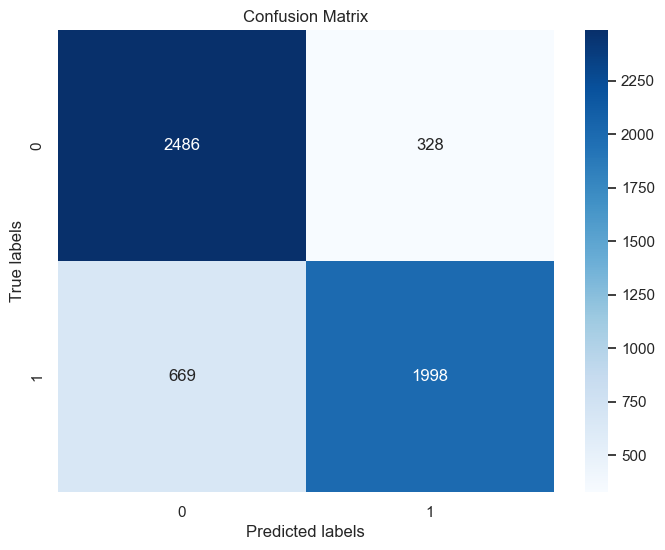

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2814
           1       0.86      0.75      0.80      2667

    accuracy                           0.82      5481
   macro avg       0.82      0.82      0.82      5481
weighted avg       0.82      0.82      0.82      5481



In [73]:
cm = confusion_matrix(y_test, grid_predictions)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,grid_predictions))

# RFC

In [74]:
from sklearn.ensemble import RandomForestClassifier
grid = RandomForestClassifier(n_estimators=100)
grid.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [75]:
grid_predictions = grid.predict(x_test_transformed)
print(confusion_matrix(y_test,grid_predictions))

[[2400  414]
 [ 383 2284]]


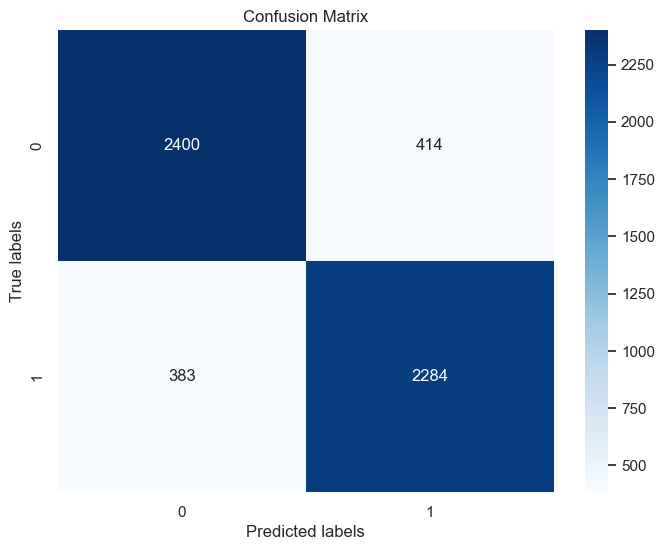

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2814
           1       0.85      0.86      0.85      2667

    accuracy                           0.85      5481
   macro avg       0.85      0.85      0.85      5481
weighted avg       0.85      0.85      0.85      5481



In [76]:
cm = confusion_matrix(y_test, grid_predictions)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,grid_predictions))

In [77]:
from sklearn.naive_bayes import MultinomialNB
# assuming X_train, X_test, y_train, y_test are already defined
param_grid = {
    'fit_prior': [True, False],
    'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0],
    'class_prior': [None, [0.1, 0.9, 0.5], [0.5, 0.5, 0.2], [0.9, 0.1, 0.5]]
}
model = MultinomialNB()
grid = GridSearchCV(model,param_grid,refit=True,verbose=3)
grid.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.801 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.812 total time=   0.0s
[CV 3/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.812 total time=   0.0s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.811 total time=   0.0s
[CV 5/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.815 total time=   0.0s
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.807 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.814 total time=   0.0s
[CV 3/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.804 total time=   0.0s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.815 total time=   0.0s
[CV 5/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.816 total time=   0.0s
[CV 1/5] END alpha=0.1, class_pri

C:\Users\nokap\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nokap\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nokap\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nokap\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 775, in fit
    self._update_class_

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0],
                         'class_prior': [None, [0.1, 0.9, 0.5], [0.5, 0.5, 0.2],
                                         [0.9, 0.1, 0.5]],
                         'fit_prior': [True, False]},
             verbose=3)

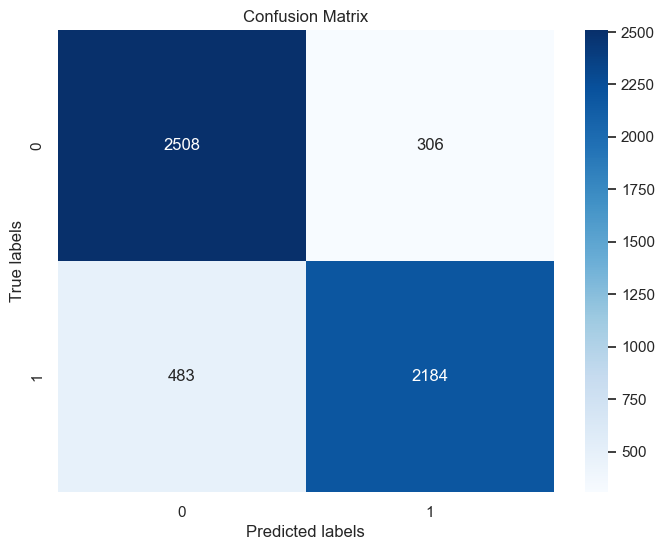

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2814
           1       0.88      0.82      0.85      2667

    accuracy                           0.86      5481
   macro avg       0.86      0.86      0.86      5481
weighted avg       0.86      0.86      0.86      5481



In [78]:
grid_predictions = grid.predict(x_test_transformed)
cm = confusion_matrix(y_test, grid_predictions)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,grid_predictions))

In [79]:
df.head()

,Message,Sentiment,text
0,Loved the comment on flashcads Im old school too,0,loved comment flashcads im old school
1,mine too,0,mine
2,Thinks that my friends lifes go around with wh...,1,thinks friends lifes go around boyfriends time...
3,Helloooo Star Wars day is cool LOOL Wen do ...,0,helloooo star wars day cool lool wen go cnater...
4,tamlyn wishes she was as cool as my sock draw,0,tamlyn wishes cool sock draw


C:\Users\nokap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


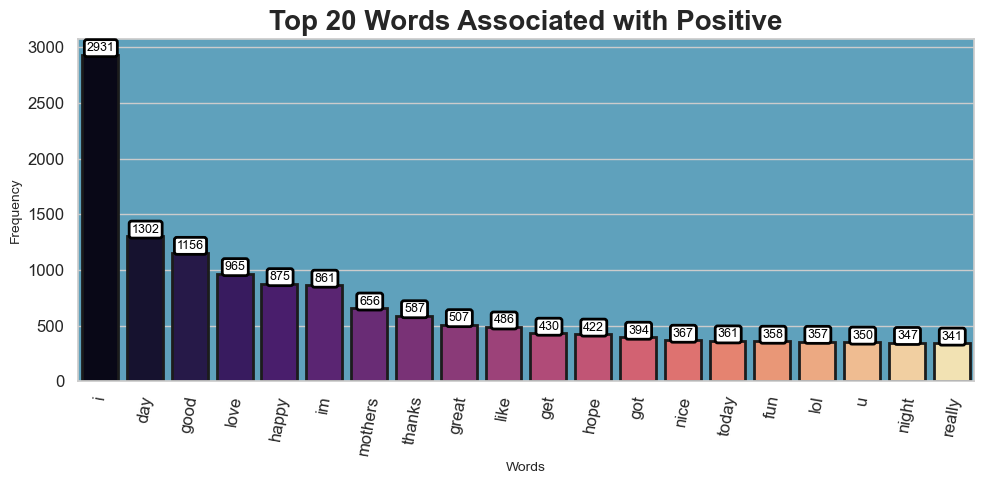

In [83]:
love_texts = df[df['Sentiment'] == 0]['text']
from nltk.tokenize import word_tokenize
from collections import Counter
# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with Positive", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\nokap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


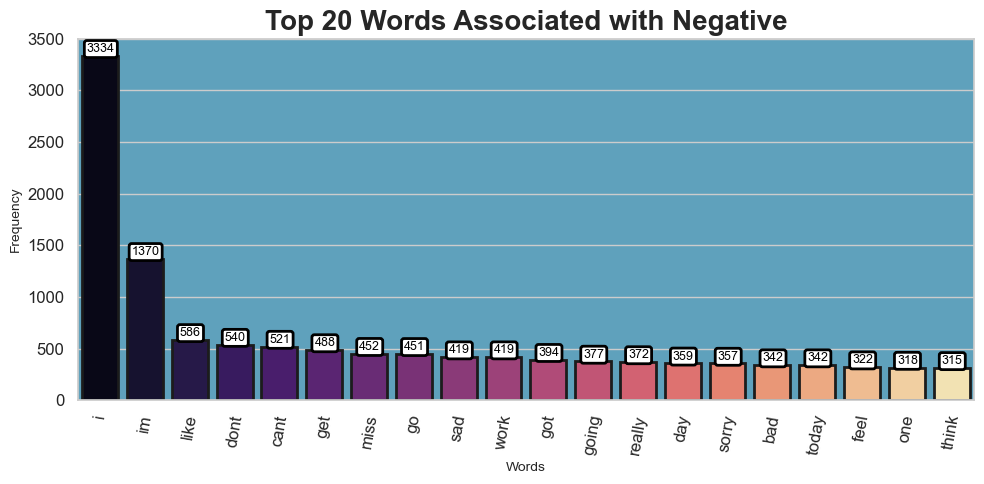

In [84]:
love_texts = df[df['Sentiment'] == 1]['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with Negative", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

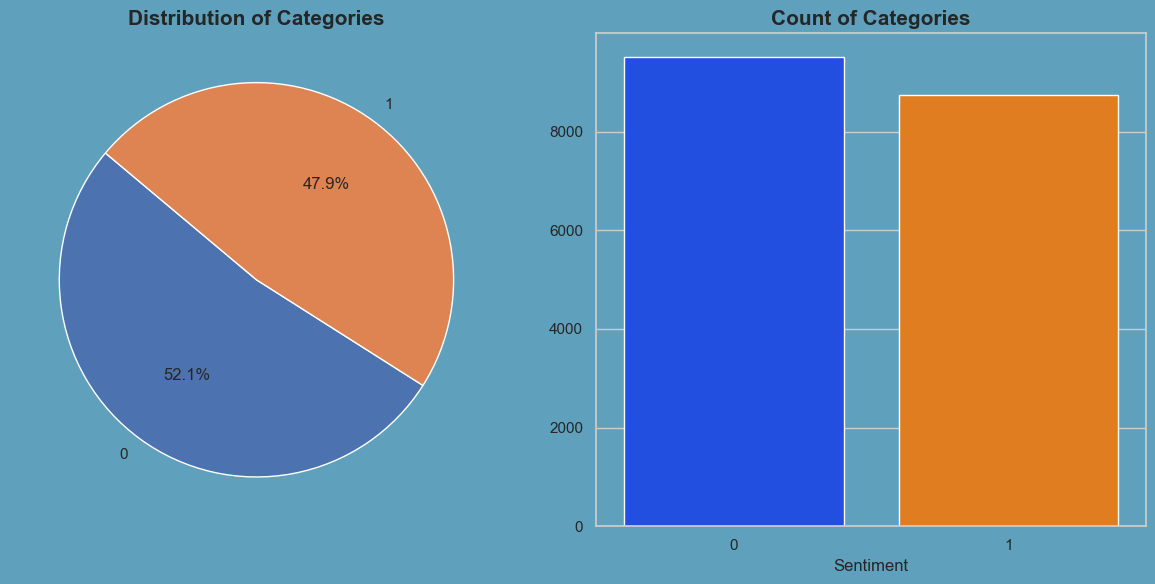

In [85]:
# Value count of 'label'
count = df['Sentiment'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()